# ARMA task
Learn an autoregressive moving average model (see Wikipedia for an introduction if unfamiliar) for at least 5 individual sensors (pick them in a sensible way!). Most statistical packages (R, statsmodels in Python) contain standard algorithm for fitting these models from training data. Use autocorrelation plots in order to identify the order of the ARMA models. The parameters can be determined using Akaike’s Information Criterion (AIC) or another model selection method. Note that there exists a wide range of ARMA variants; you only have to use the basic model.

Decide how to set the detection threshold sensibly. Study some of the anomalies detected anomalies. What kind of anomalies can you detect using ARMA models? Which sensors can be modeled effectively using ARMA?


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
def parse_date(x):    
    date = str(x).split(' ')[0]
    time_stamp = pd.datetime.strptime(date,'%d/%m/%y')
    return time_stamp
df_1 = pd.read_csv('BATADAL_dataset_training_1.csv',parse_dates=[0],date_parser=parse_date, skipinitialspace=True)
df_2 = pd.read_csv('BATADAL_dataset_training_2.csv',parse_dates=[0],date_parser=parse_date, skipinitialspace=True)
df_1.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,2014-01-06,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,2014-01-06,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,2014-01-06,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,2014-01-06,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,2014-01-06,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


## Check autocorrelation
Apply Durbin Watson test to examine autocorrelation in the data. The test will return a value between 0 and 4.
- A value of 2.0 means there is no autocorrelation detected in the sample. 
- Values from zero to 2.0 indicate positive autocorrelation.
- Values from 2.0 to 4.0 indicate negative autocorrelation.

In [9]:
sm.stats.durbin_watson(df_1['L_T1'])

0.006432171620535719

## Identifying the order of differencing(d) in ARIMA model

## Diagnosing ACF and PACF plots

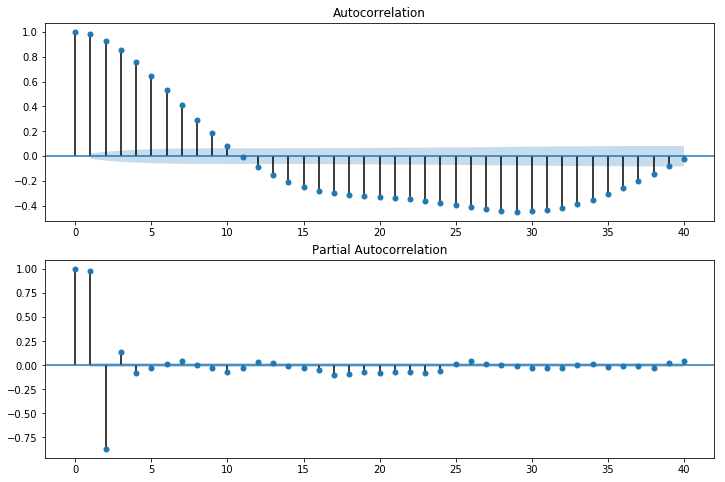

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_1['L_T1'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_1['L_T1'], lags=40, ax=ax2)